In [27]:
from sklearn.datasets import load_boston
var = load_boston()
X, y = load_boston(return_X_y=True)

In [60]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
# Import the dataset
df = pd.DataFrame(var.data, columns=var.feature_names)
df.head()
df['medv'] = var.target

In [61]:

df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
medv       0
dtype: int64

In [69]:
df.rename(columns={'medv':'Price'}, inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [71]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [72]:
corr = df.corr()
corr.shape

(14, 14)

<AxesSubplot:>

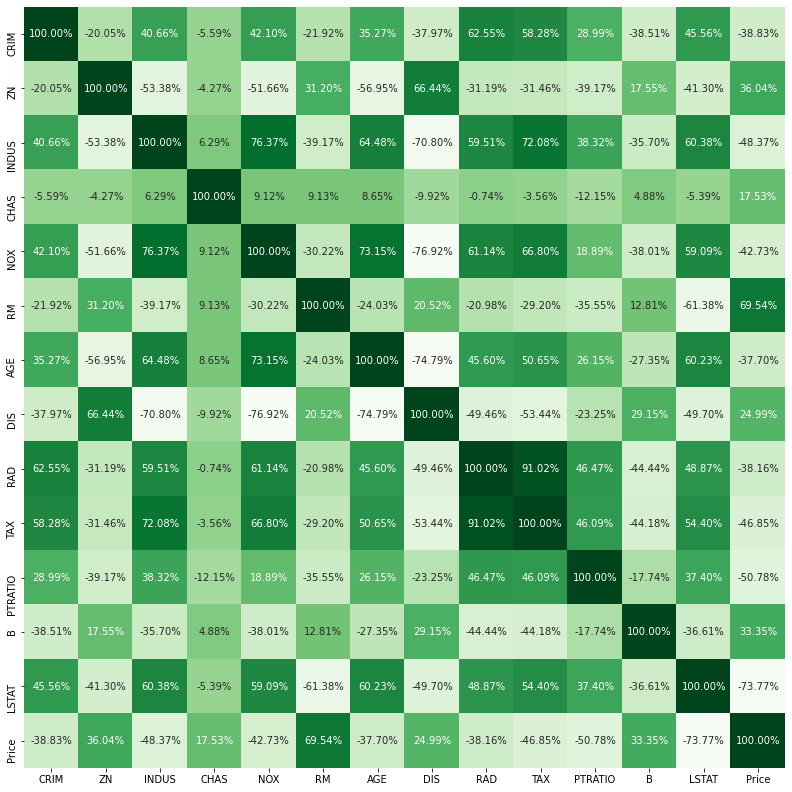

In [73]:
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=False, square=True, fmt='.2%', annot=True, cmap='Greens')

<AxesSubplot:>

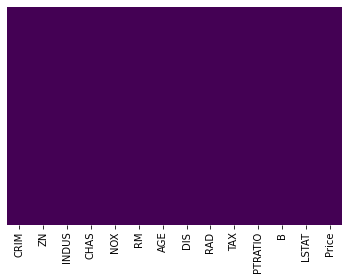

In [74]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='RAD', ylabel='count'>

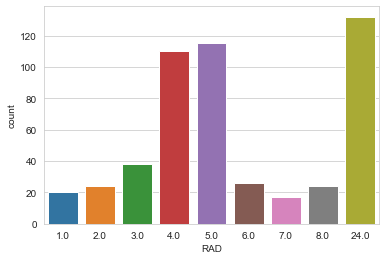

In [77]:
sns.set_style('whitegrid')
sns.countplot(x='RAD',data=df)

<AxesSubplot:xlabel='CHAS', ylabel='count'>

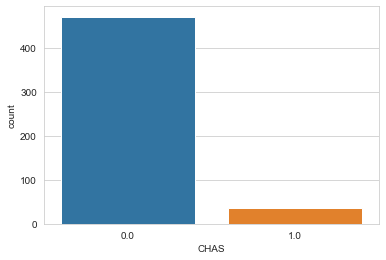

In [78]:
sns.set_style('whitegrid')
sns.countplot(x='CHAS',data=df)

<AxesSubplot:xlabel='CHAS', ylabel='count'>

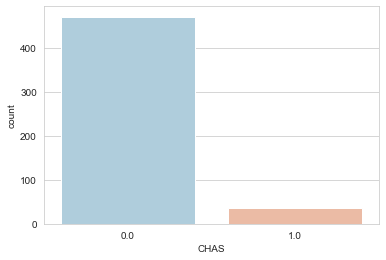

In [79]:
sns.set_style('whitegrid')
sns.countplot(x='CHAS',data=df,palette='RdBu_r')

C:\Users\thaku\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE'>

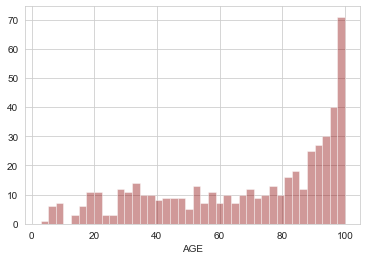

In [81]:
sns.distplot(df['AGE'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:xlabel='RM'>

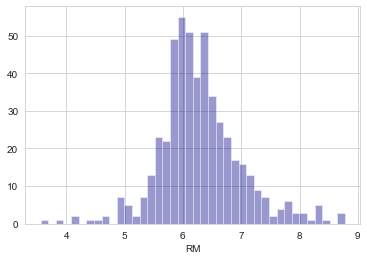

In [86]:
sns.distplot(df['RM'].dropna(),kde=False,color='darkblue',bins=40)

<AxesSubplot:xlabel='CRIM'>

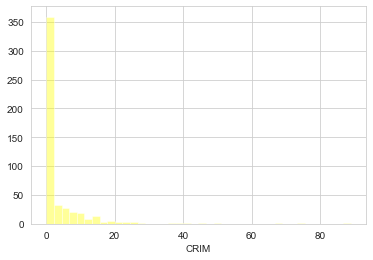

In [85]:
sns.distplot(df['CRIM'].dropna(),kde=False,color='yellow',bins=40)

In [87]:
# Lets try to understand which are important feature for this dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,0:13] #independent columns
y = df.iloc[:,-1] #target column i.e price range

In [90]:
y = np.round(df['Price'])
#Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores

,Specs,Score
0,CRIM,5503.817133
1,ZN,5937.859414
2,INDUS,873.746270
3,CHAS,59.080170
4,NOX,5.073299
5,RM,21.981504
6,AGE,2424.308937
7,DIS,163.919426
8,RAD,1445.257647
9,TAX,14817.836927


In [91]:
print(featureScores.nlargest(5,'Score')) 

   Specs         Score
9    TAX  14817.836927
1     ZN   5937.859414
0   CRIM   5503.817133
11     B   3340.486412
6    AGE   2424.308937


In [92]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [93]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.11508114 0.0232759  0.04052622 0.01379243 0.07100907 0.14041419
 0.1188926  0.10735366 0.03688294 0.04360208 0.04429975 0.1085101
 0.13635994]


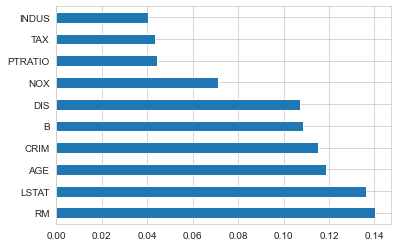

In [95]:
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [96]:
x=df.iloc[:,0:13]
y=df.iloc[:,-1]


In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [99]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [100]:
y_pred=model.predict(X_train)
print("Training Accuracy:",model.score(X_train,y_train)*100)

Training Accuracy: 77.30135569264233


In [101]:
print("Testing Accuracy:",model.score(X_test,y_test)*100)

Testing Accuracy: 58.9222384918251


In [102]:
from sklearn.metrics import mean_squared_error,r2_score

In [103]:
print("Model Accuracy:",r2_score(y,model.predict(X))*100)

Model Accuracy: 73.73440319905033


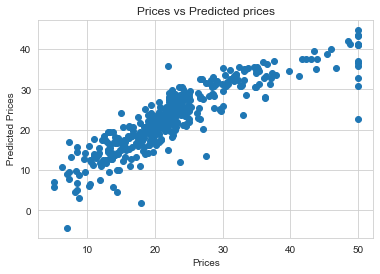

In [104]:
plt.scatter(y_train,y_pred)
plt.xlabel("Prices")
plt.ylabel(" Predicted Prices")
plt.title("Prices vs Predicted prices")
plt.show()

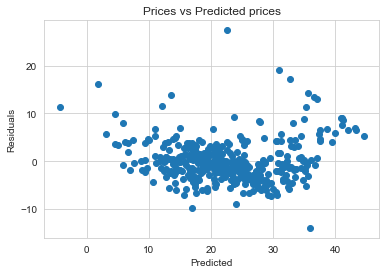

In [105]:
plt.scatter(y_pred,y_train-y_pred)
plt.title("Prices vs Predicted prices")
plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

C:\Users\thaku\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


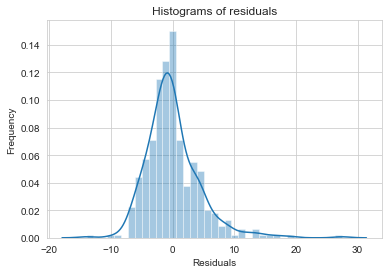

In [107]:
sns.distplot(y_train-y_pred)
plt.title("Histograms of residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.show()

In [108]:
x=df.iloc[:,[-1,5,10,4,9]]
y=df.iloc[:,-1]


In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [110]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()

reg.fit(X_train,y_train)

RandomForestRegressor()

In [114]:
y_pred=reg.predict(X_train)
print("Training Accuracy:",reg.score(X_train,y_train)*100)

Training Accuracy: 98.21756783941748


In [115]:

print("Testing Accuracy:",reg.score(X_test,y_test)*100)

Testing Accuracy: 75.69732053420239


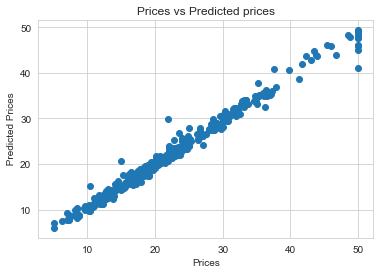

In [116]:
plt.scatter(y_train,y_pred)
plt.xlabel("Prices")
plt.ylabel(" Predicted Prices")
plt.title("Prices vs Predicted prices")
plt.show()